In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

plt.style.use('seaborn')

In [17]:
try:
    data = pd.read_csv('data/test2.acdc.dat', header=None, sep='\s+')
except FileNotFoundError:
    print('No file')


In [135]:
data.columns = ['Index', 'ASIC Index', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10',
               'C11', 'C12', 'C13', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21', 'C22',
               'C23', 'C24', 'C25', 'C26', 'C27', 'C28', 'C29', 'C30', 'Meta']

# The first 256 rows are the pedestal data
ped = data[:256]
channels = data[256:]
# channels['C2'].plot()



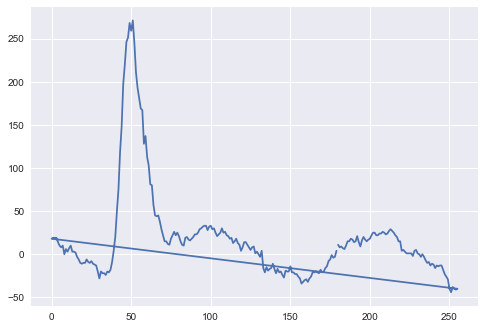

In [172]:
shift=76
y = channels['C2'][256:512]
y.index = (channels['Index'][256:512]-shift)%256
sped = ped['C2'].copy()
sped.index = (ped['Index'].copy()-shift)%256
plt.plot(y-sped)

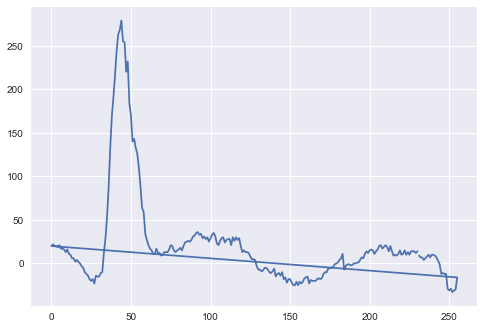

In [171]:
shift=25
y = channels['C2'][512:768]
y.index = (channels['Index'][512:768]-shift)%256
sped = ped['C2'].copy()
sped.index = (ped['Index'].copy()-shift)%256
plt.plot(y-sped)

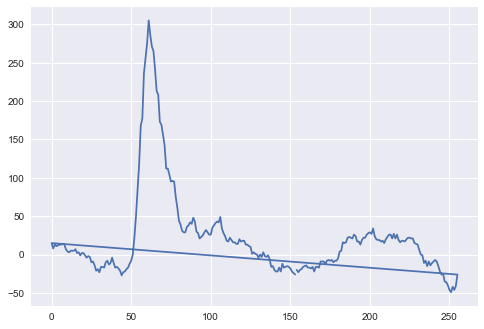

In [175]:
shift=102
y = channels['C2'][768:1024]
y.index = (channels['Index'][768:1024]-shift)%256
sped = ped['C2'].copy()
sped.index = (ped['Index'].copy()-shift)%256
plt.plot(y-sped)

def shift_plot(data, shift=0):
    y = data
    y.index = (channels['Index'][768:1024]-shift)%256
    sped = ped['C2'].copy()
    sped.index = (ped['Index'].copy()-shift)%256
    plt.plot(y-sped)

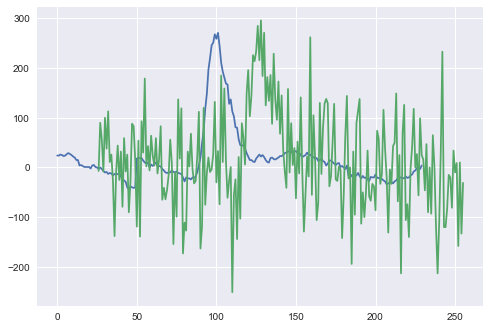

In [134]:
x = channels['C2'][256:512]
x.index = channels['ASIC Index'][256:512]
sped = ped['C2'].copy()
sped.index = ped['Index'].copy() % 256 - 26
plt.plot(x-sped)
y = channels['C2'][256:512]
y.index = channels['Index'][256:512]
plt.plot(y-ped['C2'])

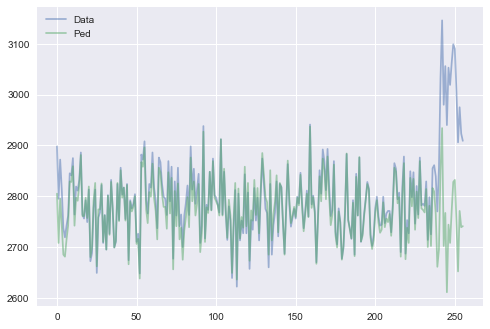

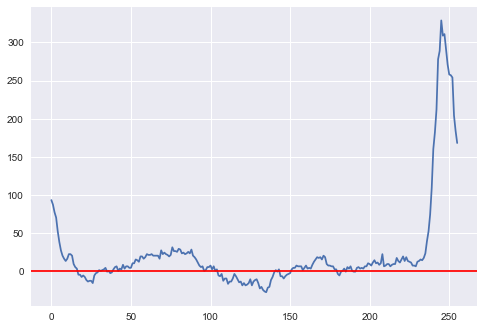

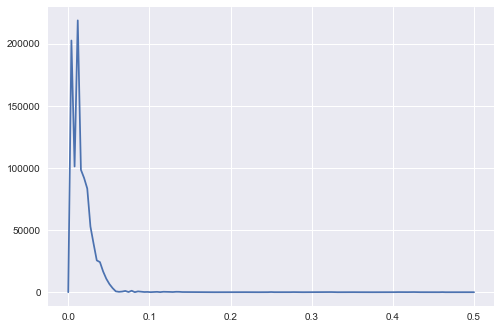

In [86]:
# Find the offset in asic wraparound
ch2 = discriminate_events(channels['ASIC Index'],channels['C2'])
ch2.name = 'Test2'
plt.plot(ch2[0], alpha=0.5, label='Data');
plt.plot(ped['C2'], alpha=0.5, label='Ped');
plt.legend(loc='best')
plt.figure()
plt.plot(ch2[0]-ped['C2']);
plt.axhline(0, color='r')
# plot_events(ch2)
plt.figure()
y, p = signal.periodogram(ch2[0]-ped['C2'])
plt.plot(y, p);

In [74]:
def discriminate_events(asic, channel, start=256, width=256, save=False):
    chan = pd.DataFrame()
    for i in range(50):
        chan[i] = channel.loc[
            (start + i*width):((i+1)*width - 1 + start)
        ].values
#         chan[i].index = asic.loc[
#             (start + i*width):((i+1)*width - 1 + start)
#         ].values
    
    if save:
        directory = 'event_data/'
        if not os.path.exists(directory):
            os.makedirs(directory)
#         print('{}{}'.format(directory,channel.name))
        chan.to_csv('{}{}.csv'.format(directory,channel.name))
    return chan

In [81]:
def plot_events(channel):
    directory = 'figs/'+channel.name
    if not os.path.exists(directory):
        os.makedirs(directory)
    for event in channel:
        fig = plt.figure()
        plt.plot(channel[event]-ped['C2'])
        plt.xlabel('Time Axis')
        plt.ylabel('ADC Counts')
        plt.title('Event: '+ str(event+1))
        plt.savefig('{}/event_{}'.format(directory, str(event+1)))
        plt.close()

In [7]:
chan = data[3]
chan.name='3000-3250'
ch2 = discriminate_events(chan)
ch2.name = chan.name
# plot_events(ch2)

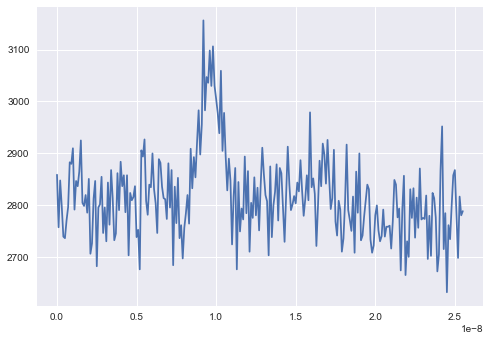

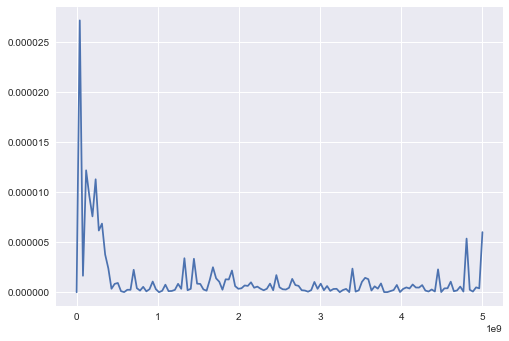

In [8]:
from scipy import signal
sig = ch2[30]
sig.index= np.asarray(ch2.index)*1e-10

fs = 1/(1e-10)

plt.plot(sig, alpha=None)

f, P = signal.periodogram(sig, fs)
plt.figure()
plt.plot(f, P)

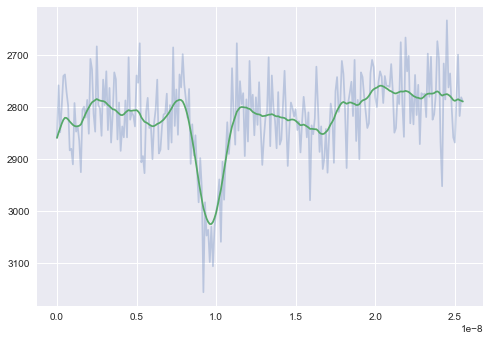

In [9]:
from scipy.signal import butter, lfilter, filtfilt,  medfilt, wiener

def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='bandpass')
    y = lfilter(b, a, data)
    return y

def filter_signal(data):
    plt.plot(data, alpha=0.3)
    plt.plot(data.index, filtfilt([1/10]*10, 1.0, data))
    plt.gca().invert_yaxis()

filter_signal(sig)
    